# Capstone Project - The Battle of Neighborhood in HONG KONG
## Part 1 - Import libraries and data

In [6]:
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml --yes

Solving environment: done

# All requested packages already installed.



### 1. Use pandas to tranform the wiki's data into a dataframe. 

In [7]:
df = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Hong_Kong')[5]

In [8]:
df

,District,Chinese,Population[when?] [6],Area(km²),Density(/km²),Region
0,Central and Western,中西區,244600,12.44,19983.92,Hong Kong Island
1,Eastern,東區,574500,18.56,31217.67,Hong Kong Island
2,Southern,南區,269200,38.85,6962.68,Hong Kong Island
3,Wan Chai,灣仔區,150900,9.83,15300.10,Hong Kong Island
4,Sham Shui Po,深水埗區,390600,9.35,41529.41,Kowloon
5,Kowloon City,九龍城區,405400,10.02,40194.70,Kowloon
6,Kwun Tong,觀塘區,641100,11.27,56779.05,Kowloon
7,Wong Tai Sin,黃大仙區,426200,9.30,45645.16,Kowloon
8,Yau Tsim Mong,油尖旺區,318100,6.99,44864.09,Kowloon
9,Islands,離島區,146900,175.12,825.14,New Territories


### 2. Pre-processing the data and rename columns

In [9]:
df.rename(columns={df.columns[2]:"Population"}, inplace=True)
df.rename(columns={df.columns[3]:"Area"}, inplace=True)
df.rename(columns={df.columns[4]:"Density"}, inplace=True)

In [10]:
df

,District,Chinese,Population,Area,Density,Region
0,Central and Western,中西區,244600,12.44,19983.92,Hong Kong Island
1,Eastern,東區,574500,18.56,31217.67,Hong Kong Island
2,Southern,南區,269200,38.85,6962.68,Hong Kong Island
3,Wan Chai,灣仔區,150900,9.83,15300.10,Hong Kong Island
4,Sham Shui Po,深水埗區,390600,9.35,41529.41,Kowloon
5,Kowloon City,九龍城區,405400,10.02,40194.70,Kowloon
6,Kwun Tong,觀塘區,641100,11.27,56779.05,Kowloon
7,Wong Tai Sin,黃大仙區,426200,9.30,45645.16,Kowloon
8,Yau Tsim Mong,油尖旺區,318100,6.99,44864.09,Kowloon
9,Islands,離島區,146900,175.12,825.14,New Territories


### 3. Use the .shape method to print the number of rows of a dataframe.

In [11]:
df.shape

(18, 6)

## Part 2 - Geometric location values are stored into the initial dataframe. 

In [12]:
!conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



In [13]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="HK_explorer")

df['Major_Dist_Coord']= df['Chinese'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,District,Chinese,Population,Area,Density,Region,Latitude,Longitude
0,Central and Western,中西區,244600,12.44,19983.92,Hong Kong Island,22.274848,114.148725
1,Eastern,東區,574500,18.56,31217.67,Hong Kong Island,22.273078,114.233594
2,Southern,南區,269200,38.85,6962.68,Hong Kong Island,22.219263,114.225230
3,Wan Chai,灣仔區,150900,9.83,15300.10,Hong Kong Island,22.273947,114.181749
4,Sham Shui Po,深水埗區,390600,9.35,41529.41,Kowloon,22.331254,114.159321
5,Kowloon City,九龍城區,405400,10.02,40194.70,Kowloon,22.321800,114.188594
6,Kwun Tong,觀塘區,641100,11.27,56779.05,Kowloon,22.308649,114.227661
7,Wong Tai Sin,黃大仙區,426200,9.30,45645.16,Kowloon,22.344322,114.202150
8,Yau Tsim Mong,油尖旺區,318100,6.99,44864.09,Kowloon,22.307404,114.165526
9,Islands,離島區,146900,175.12,825.14,New Territories,35.736156,139.714222


## Part 3 - Clustering Neighborhoods in HK

In [17]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### 1. Obtain the coordinates of HK

In [18]:
address = 'Hongkong'

geolocator = Nominatim(user_agent="Hongkong_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of HK are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of HK are 22.2793278, 114.1628131.


#### 2. Visualize the neighborhoods in HK

In [19]:
# create map of HK using latitude and longitude values
map_hk = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk) 
    
map_hk

#### 3. Utilize the Foursquare API to explore the neighborhoods and segment them.

In [20]:
CLIENT_ID = 'PBZV2AH3BLIXSDZS3GYREVKPZJ50DT00NS4PEDKGCBDVYIEX' # your Foursquare ID
CLIENT_SECRET = 'R1FBDLPRUDH44340OIV3QBPAXON000FTKPTF2RADHSOYCQCC' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PBZV2AH3BLIXSDZS3GYREVKPZJ50DT00NS4PEDKGCBDVYIEX
CLIENT_SECRET:R1FBDLPRUDH44340OIV3QBPAXON000FTKPTF2RADHSOYCQCC


In [21]:
df.loc[0, 'District']

'Central and Western'

#### 4. Obtain the coordinate of the Central and Western district.

In [22]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Central and Western are 22.27484785, 114.148724944187.


#### 5. Let's get the top 100 venues in Central and Western within a radius of 5000 meters.

In [23]:
LIMIT = 100
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=PBZV2AH3BLIXSDZS3GYREVKPZJ50DT00NS4PEDKGCBDVYIEX&client_secret=R1FBDLPRUDH44340OIV3QBPAXON000FTKPTF2RADHSOYCQCC&v=20180605&ll=22.27484785,114.148724944187&radius=5000&limit=100'

In [24]:
results = requests.get(url).json()

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,Victoria Peak (太平山),Scenic Lookout,22.271280,114.149976
1,"Morning Trail, The Peak (山頂晨運徑)",Trail,22.278008,114.144432
2,Victoria Peak Garden (山頂公園),Garden,22.273937,114.143373
3,Hong Kong Trail (Section 1) (港島徑（第一段）),Trail,22.272874,114.145895
4,New Punjab Club,Pakistani Restaurant,22.280250,114.155475


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [27]:
print ('{} unique categories in Central'.format(nearby_venues['categories'].value_counts().shape[0]))

60 unique categories in Central


In [28]:
print (nearby_venues['categories'].value_counts()[0:10])

Japanese Restaurant     7
Hotel                   6
French Restaurant       5
Café                    5
Coffee Shop             4
Italian Restaurant      4
Gym / Fitness Center    3
Park                    3
Trail                   2
Cocktail Bar            2
Name: categories, dtype: int64


In [29]:
print (nearby_venues['categories'])

0                    Scenic Lookout
1                             Trail
2                            Garden
3                             Trail
4              Pakistani Restaurant
5                        Art Museum
6                       Yoga Studio
7               Dumpling Restaurant
8              Gym / Fitness Center
9                Italian Restaurant
10                      Yoga Studio
11              Arts & Crafts Store
12                              Bar
13          Scandinavian Restaurant
14                              Zoo
15                       Beer Store
16                         Mountain
17              Shanghai Restaurant
18                     Cycle Studio
19               Dim Sum Restaurant
20              Japanese Restaurant
21               Italian Restaurant
22                            Hotel
23                       Steakhouse
24                  Thai Restaurant
25                        Juice Bar
26            Vietnamese Restaurant
27                          

#### 6. Explore neighborhoods 

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [32]:
hk_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Central and Western
Eastern
Southern
Wan Chai
Sham Shui Po
Kowloon City
Kwun Tong
Wong Tai Sin
Yau Tsim Mong
Islands
Kwai Tsing
North
Sai Kung
Sha Tin
Tai Po
Tsuen Wan
Tuen Mun
Yuen Long


In [33]:
HK_Venues_only_restaurant = hk_venues[hk_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
HK_Venues_only_restaurant.index = np.arange(1, len(HK_Venues_only_restaurant )+1)

In [34]:
print (HK_Venues_only_restaurant['Venue Category'].value_counts())

Chinese Restaurant               69
Japanese Restaurant              49
Ramen Restaurant                 26
Fast Food Restaurant             23
Cantonese Restaurant             23
Thai Restaurant                  22
Seafood Restaurant               21
Hong Kong Restaurant             20
Italian Restaurant               20
Sushi Restaurant                 19
Dumpling Restaurant              17
Dim Sum Restaurant               15
Hotpot Restaurant                13
French Restaurant                13
Asian Restaurant                 11
Restaurant                       10
Indian Restaurant                10
Vegetarian / Vegan Restaurant    10
Udon Restaurant                   8
Shanghai Restaurant               7
Taiwanese Restaurant              7
Szechuan Restaurant               6
German Restaurant                 6
Vietnamese Restaurant             6
Halal Restaurant                  6
Malay Restaurant                  5
Soba Restaurant                   4
Yoshoku Restaurant          

In [35]:
print('There are {} uniques categories.'.format(len(HK_Venues_only_restaurant['Venue Category'].unique())))

There are 53 uniques categories.


In [36]:
# create a dataframe of top 10 categories

HK_5_Dist_Venues_Top10 = HK_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
HK_5_Dist_Venues_Top10=HK_5_Dist_Venues_Top10.reset_index()

HK_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
HK_5_Dist_Venues_Top10


,Venue_Category,Frequency
0,Chinese Restaurant,69
1,Japanese Restaurant,49
2,Ramen Restaurant,26
3,Fast Food Restaurant,23
4,Cantonese Restaurant,23
5,Thai Restaurant,22
6,Seafood Restaurant,21
7,Hong Kong Restaurant,20
8,Italian Restaurant,20
9,Sushi Restaurant,19


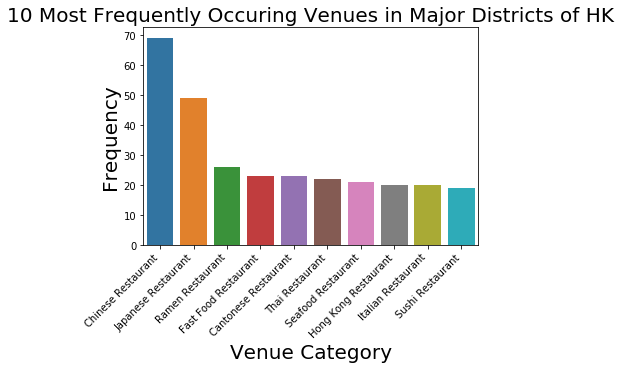

<Figure size 1296x504 with 0 Axes>

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=HK_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Major Districts of HK', fontsize=20)
plt.xlabel("Venue Category", fontsize=20)
plt.ylabel ("Frequency", fontsize=20)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [38]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", HK_Venues_only_restaurant.shape)
HK_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (489, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Central and Western,22.274848,114.148725,New Punjab Club,22.280250,114.155475,Pakistani Restaurant
2,Central and Western,22.274848,114.148725,Cheung Hing Kee Shanghai Pan-fried Buns (祥興記上海...,22.282422,114.153536,Dumpling Restaurant
3,Central and Western,22.274848,114.148725,Carbone,22.280698,114.155441,Italian Restaurant
4,Central and Western,22.274848,114.148725,Frantzén's Kitchen by Björn Frantzén,22.284808,114.148220,Scandinavian Restaurant
5,Central and Western,22.274848,114.148725,Old Bailey,22.281142,114.154018,Shanghai Restaurant
6,Central and Western,22.274848,114.148725,Mott 32 (卅二公館),22.280286,114.159080,Dim Sum Restaurant
7,Central and Western,22.274848,114.148725,Ronin,22.284525,114.152430,Japanese Restaurant
8,Central and Western,22.274848,114.148725,Posto Pubblico,22.281737,114.152521,Italian Restaurant
9,Central and Western,22.274848,114.148725,Samsen (泰館),22.285082,114.152286,Thai Restaurant
10,Central and Western,22.274848,114.148725,Chôm Chôm,22.282455,114.152390,Vietnamese Restaurant


In [39]:
HK_Venues_restaurant = HK_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [40]:
HK_Venues_restaurant

Neighborhood
Central and Western    34
Eastern                27
Islands                39
Kowloon City           22
Kwai Tsing             34
Kwun Tong              28
North                  42
Sai Kung                1
Sha Tin                30
Sham Shui Po           25
Southern               23
Tsuen Wan              28
Tuen Mun               28
Wan Chai               28
Wong Tai Sin           30
Yau Tsim Mong          24
Yuen Long              46
Name: Venue Category, dtype: int64

In [41]:
HK_Venues_restaurant_df  = HK_Venues_restaurant.to_frame().reset_index()
HK_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
HK_Venues_restaurant_df.index = np.arange(1, len(HK_Venues_restaurant_df)+1)
list_rest_no =HK_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =HK_Venues_restaurant_df['Neighborhood'].to_list()
print (list_rest_no)
print (list_dist)

[34, 27, 39, 22, 34, 28, 42, 1, 30, 25, 23, 28, 28, 28, 30, 24, 46]
['Central and Western', 'Eastern', 'Islands', 'Kowloon City', 'Kwai Tsing', 'Kwun Tong', 'North', 'Sai Kung', 'Sha Tin', 'Sham Shui Po', 'Southern', 'Tsuen Wan', 'Tuen Mun', 'Wan Chai', 'Wong Tai Sin', 'Yau Tsim Mong', 'Yuen Long']


#### 7. One hot encoding to predict all items.

In [42]:
# one hot encoding
HK_onehot = pd.get_dummies(HK_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HK_onehot['Neighborhood'] = HK_Venues_only_restaurant['Neighborhood'] 


HK_onehot.head()

,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Nabe Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoshoku Restaurant,Yunnan Restaurant,Neighborhood
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central and Western
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central and Western
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central and Western
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central and Western
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central and Western


In [43]:
HK_onehot.columns[:-1]

Index(['American Restaurant', 'Argentinian Restaurant', 'Asian Restaurant',
       'Australian Restaurant', 'Cantonese Restaurant', 'Chinese Restaurant',
       'Comfort Food Restaurant', 'Dim Sum Restaurant', 'Dumpling Restaurant',
       'Fast Food Restaurant', 'French Restaurant', 'German Restaurant',
       'Greek Restaurant', 'Halal Restaurant', 'Hong Kong Restaurant',
       'Hotpot Restaurant', 'Indian Restaurant', 'Indonesian Restaurant',
       'Italian Restaurant', 'Japanese Curry Restaurant',
       'Japanese Restaurant', 'Kebab Restaurant', 'Korean Restaurant',
       'Latin American Restaurant', 'Malay Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Nabe Restaurant', 'Pakistani Restaurant',
       'Peking Duck Restaurant', 'Ramen Restaurant', 'Restaurant',
       'Satay Restaurant', 'Scandinavian Restaurant', 'Seafood Restaurant',
       'Shaanxi Restaurant', 'Shabu-Shabu Restaurant', 'Shanghai Restaurant',
       

In [44]:
HK_onehot.shape

(489, 54)

#### 8. Group rows by neighborhood and taking the mean of frequency of each category.

In [45]:
HK_grouped = HK_onehot.groupby('Neighborhood').mean().reset_index()
HK_grouped

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Nabe Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoshoku Restaurant,Yunnan Restaurant
0,Central and Western,0.000000,0.029412,0.029412,0.000000,0.029412,0.029412,0.000000,0.029412,0.029412,0.000000,0.147059,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.117647,0.000000,0.205882,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.00000,0.029412,0.000000,0.000000,0.029412,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.058824,0.000000,0.000000,0.00000,0.058824,0.029412,0.000000,0.000000
1,Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.037037,0.037037,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.037037,0.037037,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.074074,0.000000,0.037037,0.000000,0.000000,0.00000,0.037037,0.000000,0.000000,0.000000
2,Islands,0.000000,0.000000,0.025641,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.025641,0.025641,0.102564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.179487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,0.000000,0.102564,0.051282,0.000000,0.000000,0.025641,0.051282,0.076923,0.00000,0.000000,0.051282,0.051282,0.000000
3,Kowloon City,0.000000,0.000000,0.045455,0.000000,0.090909,0.090909,0.000000,0.000000,0.090909,0.000000,0.045455,0.045455,0.000000,0.045455,0.045455,0.136364,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.045455,0.000000,0.000000,0.000000
4,Kwai Tsing,0.000000,0.000000,0.029412,0.029412,0.088235,0.176471,0.000000,0.000000,0.000000,0.058824,0.000000,0.029412,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.029412,0.029412,0.088235,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.029412,0.000000,0.029412,0.058824,0.000000,0.029412,0.000000,0.088235,0.000000,0.029412,0.00000,0.000000,0.000000,0.000000,0.029412
5,Kwun Tong,0.000000,0.000000,0.035714,0.000000,0.035714,0.107143,0.000000,0.071429,0.000000,0.000000,0.035714,0.000000,0.000000,0.035714,0.071429,0.107143,0.035714,0.000000,0.000000,0.000000,0.178571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.00000,0.035714,0.000000,0.000000,0.000000
6,North,

In [46]:
HK_grouped.shape

(17, 54)

#### 9. Top 10 common venues are selected and used to tranin the K-means Clustering Algorithm.

In [47]:
num_top_venues = 10

for hood in HK_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = HK_grouped[HK_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central and Western----
                           venue  freq
0            Japanese Restaurant  0.21
1              French Restaurant  0.15
2             Italian Restaurant  0.12
3  Vegetarian / Vegan Restaurant  0.06
4                Thai Restaurant  0.06
5             Mexican Restaurant  0.03
6           Hong Kong Restaurant  0.03
7        Scandinavian Restaurant  0.03
8           Pakistani Restaurant  0.03
9         Argentinian Restaurant  0.03


----Eastern----
                  venue  freq
0   Japanese Restaurant  0.22
1    Chinese Restaurant  0.22
2    Seafood Restaurant  0.11
3      Sushi Restaurant  0.07
4  Taiwanese Restaurant  0.07
5     Indian Restaurant  0.04
6  Hong Kong Restaurant  0.04
7       Thai Restaurant  0.04
8     Hotpot Restaurant  0.04
9   Dumpling Restaurant  0.04


----Islands----
                   venue  freq
0       Ramen Restaurant  0.18
1    Japanese Restaurant  0.10
2       Sushi Restaurant  0.10
3      Indian Restaurant  0.08
4     Chinese Restaura

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = HK_grouped['Neighborhood']

for ind in np.arange(HK_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HK_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,Japanese Restaurant,French Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Dim Sum Restaurant,Pakistani Restaurant,Hong Kong Restaurant,Restaurant,Scandinavian Restaurant
1,Eastern,Japanese Restaurant,Chinese Restaurant,Seafood Restaurant,Taiwanese Restaurant,Sushi Restaurant,Hotpot Restaurant,French Restaurant,Indian Restaurant,Dumpling Restaurant,Dim Sum Restaurant
2,Islands,Ramen Restaurant,Japanese Restaurant,Sushi Restaurant,Indian Restaurant,Udon Restaurant,Chinese Restaurant,Yoshoku Restaurant,Soba Restaurant,Szechuan Restaurant,Tonkatsu Restaurant
3,Kowloon City,Hotpot Restaurant,Dumpling Restaurant,Japanese Restaurant,Ramen Restaurant,Cantonese Restaurant,Chinese Restaurant,German Restaurant,Hong Kong Restaurant,Halal Restaurant,Shaanxi Restaurant
4,Kwai Tsing,Chinese Restaurant,Japanese Restaurant,Cantonese Restaurant,Thai Restaurant,Hong Kong Restaurant,Sushi Restaurant,Fast Food Restaurant,Shanghai Restaurant,Latin American Restaurant,Japanese Curry Restaurant
5,Kwun Tong,Japanese Restaurant,Seafood Restaurant,Hotpot Restaurant,Chinese Restaurant,Taiwanese Restaurant,Dim Sum Restaurant,Hong Kong Restaurant,Indian Restaurant,Peking Duck Restaurant,Sushi Restaurant
6,North,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Sushi Restaurant,Udon Restaurant,Asian Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Soba Restaurant
7,Sai Kung,Seafood Restaurant,Yunnan Restaurant,Halal Restaurant,Latin American Restaurant,Korean Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
8,Sha Tin,Chinese Restaurant,Cantonese Restaurant,Fast Food Restaurant,Hong Kong Restaurant,Sushi Restaurant,Shanghai Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Dumpling Restaurant,Dim Sum Restaurant
9,Sham Shui Po,Hotpot Restaurant,Ramen Restaurant,Chinese Restaurant,Dumpling Restaurant,Malay Restaurant,Japanese Restaurant,Dim Sum Restaurant,Seafood Restaurant,Shaanxi Restaurant,French Restaurant


#### 10. Find optimal number to clustering data.

In [50]:
def plot(x, y, xlable, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(3, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arrge(3, x))
    plt.show()

In [51]:
max_range = 17

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []
hk_grouped_clustering = HK_grouped.drop('Neighborhood', 1)
for kclusters in range(3, max_range):
    kgc = hk_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++',
                   random_state=0).fit_predict(kgc)
    
    score = silhouette_score(kgc, kmeans)
    
    indices.append(kclusters)
    scores.append(score)

In [ ]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

NameError: name 'xlabel' is not defined

In [ ]:
optimal_value = np.argmax(scores) + 2
optimal_value

## Cluster Neighborhoods
#### 11. Use K-means to cluster the data into optimal number's clusters.

In [ ]:
# set number of clusters
kclusters = optimal_value
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
hk_grouped_clustering = HK_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hk_grouped_clustering)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

In [ ]:
hk_merged = df
hk_merged.rename(columns={'District':'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hk_merged = hk_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

hk_merged = hk_merged.dropna()
hk_merged 

In [66]:
# create map
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lon, poi, cluster in zip(hk_merged['Latitude'], 
                                  hk_merged['Longitude'], 
                                  hk_merged['Neighborhood'], 
                                  hk_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

## Examine the Clusters
#### Cluster 1

In [67]:
hk_merged.loc[hk_merged['Cluster Labels'] == 0, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Chinese,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,屯門區,New Territories,22.37884,113.95283,0.0,Fast Food Restaurant,Seafood Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Italian Restaurant,Shanghai Restaurant,Indonesian Restaurant,Indian Restaurant,Restaurant,Satay Restaurant


#### Cluster 2

In [68]:
hk_merged.loc[hk_merged['Cluster Labels'] == 1, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Chinese,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,中西區,Hong Kong Island,22.274848,114.148725,1.0,Japanese Restaurant,French Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Dim Sum Restaurant,Pakistani Restaurant,Hong Kong Restaurant,Restaurant,Scandinavian Restaurant
3,灣仔區,Hong Kong Island,22.273947,114.181749,1.0,Italian Restaurant,Dumpling Restaurant,Thai Restaurant,Chinese Restaurant,Japanese Restaurant,Greek Restaurant,Middle Eastern Restaurant,Seafood Restaurant,French Restaurant,Shanghai Restaurant
8,油尖旺區,Kowloon,22.307404,114.165526,1.0,Japanese Restaurant,Dumpling Restaurant,Italian Restaurant,Thai Restaurant,Chinese Restaurant,Pakistani Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Shaanxi Restaurant


#### Cluster 3

In [69]:
hk_merged.loc[hk_merged['Cluster Labels'] == 2, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Chinese,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,西貢區,New Territories,22.30701,114.371345,2.0,Seafood Restaurant,Yunnan Restaurant,Halal Restaurant,Latin American Restaurant,Korean Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant


#### Cluster 4

In [70]:
hk_merged.loc[hk_merged['Cluster Labels'] == 3, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Chinese,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,葵青區,New Territories,22.341007,114.104285,3.0,Chinese Restaurant,Japanese Restaurant,Cantonese Restaurant,Thai Restaurant,Hong Kong Restaurant,Sushi Restaurant,Fast Food Restaurant,Shanghai Restaurant,Latin American Restaurant,Japanese Curry Restaurant
13,沙田區,New Territories,22.391573,114.208098,3.0,Chinese Restaurant,Cantonese Restaurant,Fast Food Restaurant,Hong Kong Restaurant,Sushi Restaurant,Shanghai Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Dumpling Restaurant,Dim Sum Restaurant
15,荃灣區,New Territories,22.364987,114.077688,3.0,Chinese Restaurant,Japanese Restaurant,Thai Restaurant,Sushi Restaurant,Cantonese Restaurant,Yunnan Restaurant,Indian Restaurant,German Restaurant,Ramen Restaurant,Fast Food Restaurant
17,元朗區,New Territories,22.457296,114.021319,3.0,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Hong Kong Restaurant,Restaurant,Japanese Restaurant,Dim Sum Restaurant,American Restaurant,Halal Restaurant,German Restaurant


#### Cluster 5

In [71]:
hk_merged.loc[hk_merged['Cluster Labels'] == 4, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Chinese,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,離島區,New Territories,35.736156,139.714222,4.0,Ramen Restaurant,Japanese Restaurant,Sushi Restaurant,Indian Restaurant,Udon Restaurant,Chinese Restaurant,Yoshoku Restaurant,Soba Restaurant,Szechuan Restaurant,Tonkatsu Restaurant
11,北區,New Territories,35.755838,139.736687,4.0,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Sushi Restaurant,Udon Restaurant,Asian Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Soba Restaurant


#### Cluster 6

In [72]:
hk_merged.loc[hk_merged['Cluster Labels'] == 5, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Chinese,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,東區,Hong Kong Island,22.273078,114.233594,5.0,Japanese Restaurant,Chinese Restaurant,Seafood Restaurant,Taiwanese Restaurant,Sushi Restaurant,Hotpot Restaurant,French Restaurant,Indian Restaurant,Dumpling Restaurant,Dim Sum Restaurant
4,深水埗區,Kowloon,22.331254,114.159321,5.0,Hotpot Restaurant,Ramen Restaurant,Chinese Restaurant,Dumpling Restaurant,Malay Restaurant,Japanese Restaurant,Dim Sum Restaurant,Seafood Restaurant,Shaanxi Restaurant,French Restaurant
5,九龍城區,Kowloon,22.321800,114.188594,5.0,Hotpot Restaurant,Dumpling Restaurant,Japanese Restaurant,Ramen Restaurant,Cantonese Restaurant,Chinese Restaurant,German Restaurant,Hong Kong Restaurant,Halal Restaurant,Shaanxi Restaurant
6,觀塘區,Kowloon,22.308649,114.227661,5.0,Japanese Restaurant,Seafood Restaurant,Hotpot Restaurant,Chinese Restaurant,Taiwanese Restaurant,Dim Sum Restaurant,Hong Kong Restaurant,Indian Restaurant,Peking Duck Restaurant,Sushi Restaurant
7,黃大仙區,Kowloon,22.344322,114.202150,5.0,Cantonese Restaurant,Hotpot Restaurant,Thai Restaurant,Chinese Restaurant,Szechuan Restaurant,Hong Kong Restaurant,Halal Restaurant,Dumpling Restaurant,Dim Sum Restaurant,Ramen Restaurant


#### Cluster 7

In [73]:
hk_merged.loc[hk_merged['Cluster Labels'] == 6, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Chinese,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,南區,Hong Kong Island,22.219263,114.22523,6.0,Restaurant,Chinese Restaurant,Thai Restaurant,Mediterranean Restaurant,Seafood Restaurant,Mexican Restaurant,Shanghai Restaurant,Asian Restaurant,Australian Restaurant,French Restaurant
